## Time Series & Advanced Indexing - NOAA Daily Weather dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
# City info
city_attr = pd.read_csv("NOAA-Daily-Weather\city_attributes.csv")

# Time series
humidity = pd.read_csv("NOAA-Daily-Weather/humidity.csv", parse_dates=["datetime"])
pressure = pd.read_csv("NOAA-Daily-Weather/pressure.csv", parse_dates=["datetime"])
temperature = pd.read_csv("NOAA-Daily-Weather/temperature.csv", parse_dates=["datetime"])
weather_desc = pd.read_csv("NOAA-Daily-Weather/weather_description.csv", parse_dates=["datetime"])
wind_dir = pd.read_csv("NOAA-Daily-Weather/wind_direction.csv", parse_dates=["datetime"])
wind_speed = pd.read_csv("NOAA-Daily-Weather/wind_speed.csv", parse_dates=["datetime"])

In [3]:
city_attr.head()

,City,Country,Latitude,Longitude
0,Vancouver,Canada,49.249660,-123.119339
1,Portland,United States,45.523449,-122.676208
2,San Francisco,United States,37.774929,-122.419418
3,Seattle,United States,47.606209,-122.332069
4,Los Angeles,United States,34.052231,-118.243683


In [4]:
temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   datetime           45253 non-null  datetime64[ns]
 1   Vancouver          44458 non-null  float64       
 2   Portland           45252 non-null  float64       
 3   San Francisco      44460 non-null  float64       
 4   Seattle            45250 non-null  float64       
 5   Los Angeles        45250 non-null  float64       
 6   San Diego          45252 non-null  float64       
 7   Las Vegas          45252 non-null  float64       
 8   Phoenix            45250 non-null  float64       
 9   Albuquerque        45252 non-null  float64       
 10  Denver             45252 non-null  float64       
 11  San Antonio        45252 non-null  float64       
 12  Dallas             45249 non-null  float64       
 13  Houston            45250 non-null  float64       
 14  Kansas

In [5]:
# humidity.head()

In [6]:
# pressure.head()

In [7]:
temperature['Vancouver'].mean()

283.86265374154226

In [8]:
# weather_desc.head()

In [9]:
# wind_dir.head()

In [10]:
# wind_speed.head()

In [13]:
## resample hourly -> daily average

vancouver_temp = temperature[['datetime', 'Vancouver']].set_index('datetime')

daily_temp = vancouver_temp.resample('D').mean()
print(daily_temp.head())

# vancouver_temp = temperature[['datetime', 'Vancouver']].set_index('datetime')
# vancouver_temp_daily = vancouver_temp.resample('D').mean().reset_index()
# print(vancouver_temp_daily.head())

             Vancouver
datetime              
2012-10-01  284.620769
2012-10-02  286.145190
2012-10-03  285.528125
2012-10-04  284.373333
2012-10-05  283.757292


In [14]:
daily_temp = daily_temp.asfreq("D").ffill()
daily_temp

,Vancouver
datetime,
2012-10-01,284.620769
2012-10-02,286.145190
2012-10-03,285.528125
2012-10-04,284.373333
2012-10-05,283.757292
...,...
2017-11-26,288.010000
2017-11-27,288.010000
2017-11-28,288.010000


In [15]:
daily_temp["temp_shifted"] = daily_temp["Vancouver"].shift(1) # yesterday’s temperature.
daily_temp["temp_diff"] = daily_temp["Vancouver"] - daily_temp["temp_shifted"]
daily_temp.head()

,Vancouver,temp_shifted,temp_diff
datetime,,,
2012-10-01,284.620769,NaN,NaN
2012-10-02,286.145190,284.620769,1.524421
2012-10-03,285.528125,286.145190,-0.617065
2012-10-04,284.373333,285.528125,-1.154792
2012-10-05,283.757292,284.373333,-0.616042


In [16]:
## localize timezone and convert to UTC - 

# tz_localize sets the original timezone.
# 👉 tz_convert translates to another timezone (e.g., UTC).
daily_temp = daily_temp.tz_localize("US/Pacific").tz_convert("UTC") 
print(daily_temp.index[:5])

DatetimeIndex(['2012-10-01 07:00:00+00:00', '2012-10-02 07:00:00+00:00',
               '2012-10-03 07:00:00+00:00', '2012-10-04 07:00:00+00:00',
               '2012-10-05 07:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='datetime', freq=None)


In [17]:
# Step 6. Rolling 7-day average humidity
vancouver_humidity = humidity[["datetime", "Vancouver"]].set_index("datetime")
daily_humidity = vancouver_humidity.resample("D").mean()
daily_humidity["humidiaty_7D_MA"] = daily_humidity["Vancouver"].rolling(7).mean()
print(daily_humidity.head(15))

            Vancouver  humidiaty_7D_MA
datetime                              
2012-10-01  78.272727              NaN
2012-10-02  77.375000              NaN
2012-10-03  71.625000              NaN
2012-10-04  49.000000              NaN
2012-10-05  43.409091              NaN
2012-10-06  43.166667              NaN
2012-10-07  49.888889        58.962482
2012-10-08  59.842105        56.329536
2012-10-09  61.875000        54.115250
2012-10-10  76.173913        54.765095
2012-10-11  76.380952        58.676660
2012-10-12  89.956522        65.326293
2012-10-13  86.739130        71.550930
2012-10-14  92.791667        77.679899
2012-10-15  91.142857        82.151434


In [18]:
## Resample Hourly -> daily average : for San Francisco

sf_temp = temperature[['datetime', 'San Francisco']].set_index('datetime')
sf_daily_temp = sf_temp.resample("D").mean()
sf_daily_temp.head()

,San Francisco
datetime,
2012-10-01,289.416642
2012-10-02,292.958306
2012-10-03,296.929167
2012-10-04,295.687083
2012-10-05,290.635417


In [19]:
## Forword fill missing values
sf_daily_temp = sf_daily_temp.asfreq("D").ffill()

In [20]:
## Shift series and Compute difference
sf_daily_temp["temp_shifted"] = sf_daily_temp["San Francisco"].shift(1)
sf_daily_temp["temp_diff"] = sf_daily_temp["San Francisco"] - sf_daily_temp["temp_shifted"]

sf_daily_temp.head()

,San Francisco,temp_shifted,temp_diff
datetime,,,
2012-10-01,289.416642,NaN,NaN
2012-10-02,292.958306,289.416642,3.541664
2012-10-03,296.929167,292.958306,3.970861
2012-10-04,295.687083,296.929167,-1.242083
2012-10-05,290.635417,295.687083,-5.051667


In [47]:
## localize and convert to UTC
sf_daily_temp = sf_daily_temp.tz_localize("US/Pacific").tz_convert("UTC")
sf_daily_temp

,San Francisco,temp_shifted,temp_diff
datetime,,,
2012-10-01 07:00:00+00:00,289.416642,NaN,NaN
2012-10-02 07:00:00+00:00,292.958306,289.416642,3.541664
2012-10-03 07:00:00+00:00,296.929167,292.958306,3.970861
2012-10-04 07:00:00+00:00,295.687083,296.929167,-1.242083
2012-10-05 07:00:00+00:00,290.635417,295.687083,-5.051667
...,...,...,...
2017-11-26 08:00:00+00:00,302.070000,302.070000,0.000000
2017-11-27 08:00:00+00:00,302.070000,302.070000,0.000000
2017-11-28 08:00:00+00:00,302.070000,302.070000,0.000000


In [21]:
## Rolling 7 day average humidity

sf_humidity = humidity[['datetime', 'San Francisco']].set_index('datetime')
sf_daily_humidity = sf_humidity.resample("D").mean()

sf_daily_humidity["humidity_7D_MA"] = sf_daily_humidity["San Francisco"].rolling(7).mean()
sf_daily_humidity.head(10)

,San Francisco,humidity_7D_MA
datetime,,
2012-10-01,83.000000,NaN
2012-10-02,65.958333,NaN
2012-10-03,47.083333,NaN
2012-10-04,60.166667,NaN
2012-10-05,69.666667,NaN
2012-10-06,73.541667,NaN
2012-10-07,71.583333,67.285714
2012-10-08,72.041667,65.720238
2012-10-09,74.208333,66.898810


## YAHOO Finance Data - 

In [22]:
pip install --upgrade --no-cache-dir numpy pandas scipy scikit-learn matplotlib seaborn --user


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
catboost 1.2.7 requires numpy<2.0,>=1.16.0, but you have numpy 2.3.3 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.3.3 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.16.1 which is incompatible.
numba 0.61.0 requires numpy<2.2,>=1.24, but you have numpy 2.3.3 which is incompatible.
tensorflow-intel 2.13.0 requires numpy<=1.24.3,>=1.22, but you have numpy 2.3.3 which is incompatible.

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/13.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/13.1 MB ? eta -:--:--
     --------------------------------------- 0.0/13.1 MB 487.6 kB/s eta 0:00:27
     ---------------------------------------- 0.1/13.1 MB 1.0 MB/s eta 0:00:13
      --------------------------------------- 0.2/13.1 MB 1.2 MB/s eta 0:00:11
      --------------------------------------- 0.2/13.1 MB 1.1 MB/s eta 0:00:12
      --------------------------------------- 0.3/13.1 MB 1.2 MB/s eta 0:00:11
     - -------------------------------------- 0.4/13.1 MB 1.2 MB/s eta 0:00:11
     - -------------------------------------- 0.5/13.1 MB 1.4 MB/s eta 0:00:09
     - -------------------------------------- 0.5/13.1 MB 1.3 MB/s eta 0:00:10
     - -------------------------------------- 0.6/13.1 MB 1.4 MB/s eta 0:00:10
     -- ------------------------------------- 0.7/13.1 MB 1.4 MB/s eta 0:00:09
     -- ------------------------------------- 0.7/13.1 MB 1.5 MB

In [23]:
import yfinance as yf
import pandas as pd

In [24]:
# pip install --upgrade yfinance

In [25]:
# apple = yf.Ticker("AAPL")
# data = apple.history(period="5y")
# print(data.head())

In [26]:
data = yf.download("AAPL", start="2018-01-01", end="2023-12-31",)
print(data.head())

C:\Users\atalb\AppData\Local\Temp\ipykernel_23252\1386643479.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2018-01-01", end="2023-12-31",)
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2018-01-02  40.380985  40.390364  39.677729  39.888708  102223600
2018-01-03  40.373966  40.917820  40.310676  40.444293  118071600
2018-01-04  40.561497  40.664642  40.338800  40.446630   89738400
2018-01-05  41.023312  41.110045  40.566195  40.657619   94640000
2018-01-08  40.870930  41.166296  40.772471  40.870930   82271200


In [27]:
data.describe

<bound method NDFrame.describe of Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2018-01-02   40.380985   40.390364   39.677729   39.888708  102223600
2018-01-03   40.373966   40.917820   40.310676   40.444293  118071600
2018-01-04   40.561497   40.664642   40.338800   40.446630   89738400
2018-01-05   41.023312   41.110045   40.566195   40.657619   94640000
2018-01-08   40.870930   41.166296   40.772471   40.870930   82271200
...                ...         ...         ...         ...        ...
2023-12-22  191.974686  193.769488  191.349970  193.541408   37149600
2023-12-26  191.429291  192.262235  191.211137  191.984587   28919300
2023-12-27  191.528427  191.875495  189.485724  190.873980   48087700
2023-12-28  191.954849  193.025784  191.548288  192.510145   34049900
2023-12-29  190.913666  192.767962  190.120379  192.2721

In [28]:
data.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [29]:
data.isna()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,False,False,False,False,False
2018-01-03,False,False,False,False,False
2018-01-04,False,False,False,False,False
2018-01-05,False,False,False,False,False
2018-01-08,False,False,False,False,False
...,...,...,...,...,...
2023-12-22,False,False,False,False,False
2023-12-26,False,False,False,False,False


In [30]:
data = data.dropna()
data

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,40.380985,40.390364,39.677729,39.888708,102223600
2018-01-03,40.373966,40.917820,40.310676,40.444293,118071600
2018-01-04,40.561497,40.664642,40.338800,40.446630,89738400
2018-01-05,41.023312,41.110045,40.566195,40.657619,94640000
2018-01-08,40.870930,41.166296,40.772471,40.870930,82271200
...,...,...,...,...,...
2023-12-22,191.974686,193.769488,191.349970,193.541408,37149600
2023-12-26,191.429291,192.262235,191.211137,191.984587,28919300


In [31]:
data = data.xs("AAPL", level="Ticker", axis=1)

In [34]:
# Normalize numeric columns (min-max scaling)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data[['Close', 'High', 'Open', 'Low', 'Volume']] = scaler.fit_transform(data[['Close', 'High', 'Open', 'Low', 'Volume']])
data

Price,Close,High,Low,Open,Volume
Date,,,,,
2018-01-02,0.010839,0.000000,0.000000,0.000000,0.557323
2018-01-03,0.000000,0.679752,0.578157,0.565626,1.000000
2018-01-04,0.288809,0.353470,0.603854,0.568014,0.208579
2018-01-05,1.000000,0.927495,0.811568,0.782819,0.345493
2018-01-08,0.765343,1.000000,1.000000,1.000000,0.000000


In [ ]:
# data["Close"]["AAPL"][0:5]

Date
2018-01-02    40.380997
2018-01-03    40.373959
2018-01-04    40.561497
2018-01-05    41.023308
2018-01-08    40.870934
Name: AAPL, dtype: float64

In [17]:
# Drop rows with missing values (if any)
df = data.dropna()

# Normalize numeric columns (min-max scaling 0–1)
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df),
    columns=df.columns,
    index=df.index
)
print(df_scaled.head())


Price          Close      High       Low      Open    Volume
Date                                                        
2018-01-02  0.010839  0.000000  0.000000  0.000000  0.557323
2018-01-03  0.000000  0.679752  0.578157  0.565626  1.000000
2018-01-04  0.288809  0.353470  0.603854  0.568014  0.208579
2018-01-05  1.000000  0.927495  0.811568  0.782819  0.345493
2018-01-08  0.765343  1.000000  1.000000  1.000000  0.000000


In [19]:
## group by year
grouped = df.groupby(df.index.year).agg(
    avg_close=("Close", "mean"),
    total_volume=("Volume", "sum")
)
print(grouped)

      avg_close  total_volume
Date                         
2018   0.412998      2.111395


In [24]:
## cahin multiple operation
summary = (
    data.dropna()
      .assign(Return=lambda x: x["Close"].pct_change())
      .groupby(df.index.year)
      .agg(
          avg_close=("Close", "mean"),
          avg_return=("Return", "mean"),
          volatility=("Return", "std"),
          total_volume=("Volume", "sum")
      )
      .reset_index()
      .rename(columns={"index": "Year"})
)
print(summary)



   Date  avg_close  avg_return  volatility  total_volume
0  2018  40.642139    0.003035    0.006536     486944800


In [25]:
corr = data.corr(numeric_only=True)
print(corr)

Price      Close      High       Low      Open    Volume
Price                                                   
Close   1.000000  0.760053  0.758052  0.754769 -0.667720
High    0.760053  1.000000  0.936435  0.942171 -0.277457
Low     0.758052  0.936435  1.000000  0.999085 -0.487576
Open    0.754769  0.942171  0.999085  1.000000 -0.487770
Volume -0.667720 -0.277457 -0.487576 -0.487770  1.000000


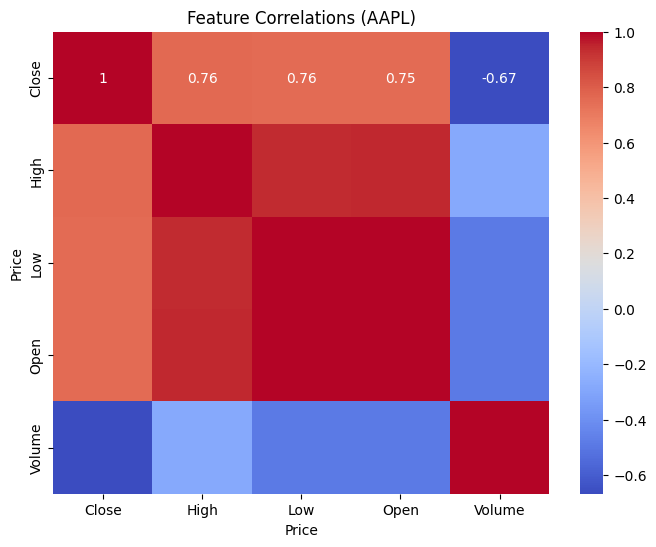

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlations (AAPL)")
plt.show()


In [27]:
# General summary
summary_stats = df.describe().T
print(summary_stats)

# Grouped summary (by year)
yearly_stats = df.groupby(df.index.year).describe().T
print(yearly_stats)

        count      mean       std  min       25%       50%       75%  max
Price                                                                    
Close     5.0  0.412998  0.451786  0.0  0.010839  0.288809  0.765343  1.0
High      5.0  0.592144  0.416558  0.0  0.353470  0.679752  0.927495  1.0
Low       5.0  0.598716  0.375914  0.0  0.578157  0.603854  0.811568  1.0
Open      5.0  0.583292  0.372234  0.0  0.565626  0.568014  0.782819  1.0
Volume    5.0  0.422279  0.381406  0.0  0.208579  0.345493  0.557323  1.0
Date              2018
Price                 
Close  count  5.000000
       mean   0.412998
       std    0.451786
       min    0.000000
       25%    0.010839
       50%    0.288809
       75%    0.765343
       max    1.000000
High   count  5.000000
       mean   0.592144
       std    0.416558
       min    0.000000
       25%    0.353470
       50%    0.679752
       75%    0.927495
       max    1.000000
Low    count  5.000000
       mean   0.598716
       std    0.375914

In [29]:
data["Close_30d_MA"] = data["Close"].rolling(window=30).mean()
data["Close_30d_MA"].head(50)

Date
2018-01-02   NaN
2018-01-03   NaN
2018-01-04   NaN
2018-01-05   NaN
2018-01-08   NaN
Name: Close_30d_MA, dtype: float64

In [35]:
# First calculate daily returns
data["Return"] = data["Close"].pct_change()
data["Return"]

# 30-day rolling standard deviation = volatility
data["Volatility_30d"] = data["Return"].rolling(window=30).std()
data["Volatility_30d"]

Date
2018-01-02   NaN
2018-01-03   NaN
2018-01-04   NaN
2018-01-05   NaN
2018-01-08   NaN
Name: Volatility_30d, dtype: float64

## EDA PANDAS - 

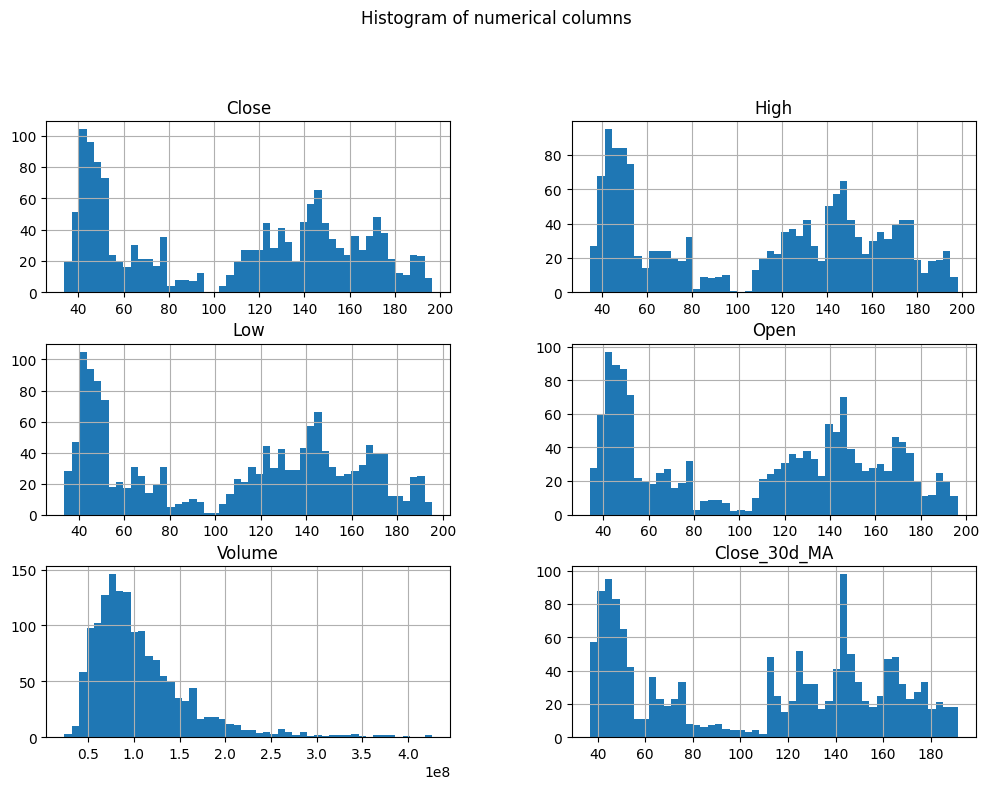

In [67]:
import matplotlib.pyplot as plt 
import numpy as np


# data = data.replace([np.inf, -np.inf], np.nan).dropna()
df.hist(figsize=(12, 8), bins=50)
plt.suptitle("Histogram of numerical columns", y=1.02)
plt.show()

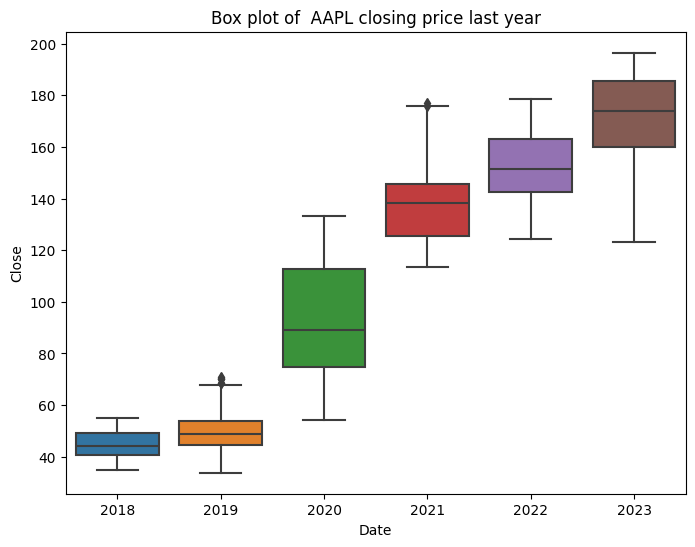

In [ ]:
## Boxplot - 

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(x=df.index.year, y=df['Close'])
plt.title("Box plot of  AAPL closing price")
plt.show()


In [63]:
df = data

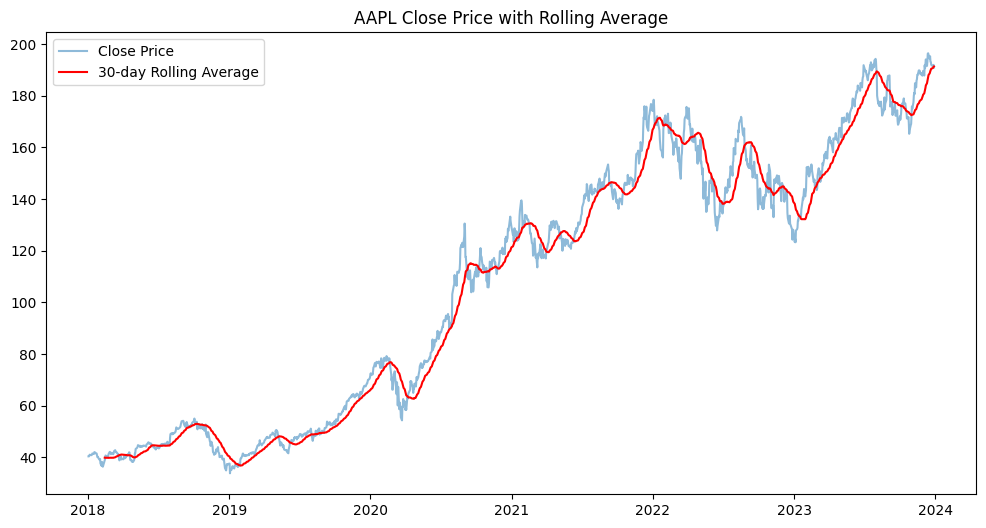

In [65]:
df["Close_30d_MA"] = df["Close"].rolling(window=30).mean()

plt.figure(figsize=(12,6))
plt.plot(df["Close"], label="Close Price", alpha=0.5)
plt.plot(df["Close_30d_MA"], label="30-day Rolling Average", color="red")
plt.legend()
plt.title("AAPL Close Price with Rolling Average")
plt.show()

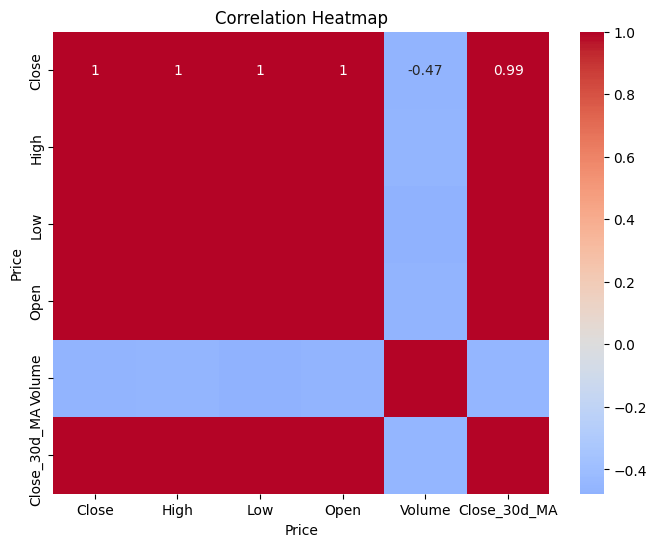

In [68]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

In [70]:
pip install ydata-profiling


     ---------------------------------------- 0.0/400.1 kB ? eta -:--:--
     - ----------------------------------- 20.5/400.1 kB 330.3 kB/s eta 0:00:02
     -------- ---------------------------- 92.2/400.1 kB 871.5 kB/s eta 0:00:01
     ---------------------- --------------- 235.5/400.1 kB 1.6 MB/s eta 0:00:01
     -------------------------------------  399.4/400.1 kB 1.9 MB/s eta 0:00:01
     -------------------------------------- 400.1/400.1 kB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 0.0/444.8 kB ? eta -:--:--
     ------------------- ------------------ 225.3/444.8 kB 6.9 MB/s eta 0:00:01
     -------------------------------- ----- 378.9/444.8 kB 4.7 MB/s eta 0:00:01
     -------------------------------------- 444.8/444.8 kB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/105.4 kB ? eta -:--:--
     -------------------------------------- 105.4/105.4 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadat

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\atalb\\AppData\\Local\\Temp\\pip-uninstall-oy1x3jm0\\core\\_multiarray_tests.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="AAPL Stock EDA Report", explorative=True)
profile.to_notebook_iframe()

ModuleNotFoundError: No module named 'ydata_profiling'